In [272]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import set_random_seed
from keras.layers import Input,Dropout,Dense,LSTM,TimeDistributed,RepeatVector
from keras.models import Model
from keras import regularizers
seed = 10
set_random_seed(seed)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        (None, 5, 2)              0         
_________________________________________________________________
lstm_202 (LSTM)              (None, 5, 8)              352       
_________________________________________________________________
lstm_203 (LSTM)              (None, 5, 4)              208       
_________________________________________________________________
lstm_204 (LSTM)              (None, 5, 2)              56        
_________________________________________________________________
lstm_205 (LSTM)              (None, 1)                 16        
_________________________________________________________________
repeat_vector_30 (RepeatVect (None, 5, 1)              0         
_________________________________________________________________
lstm_206 (LSTM)              (None, 5, 1)              12        
__________

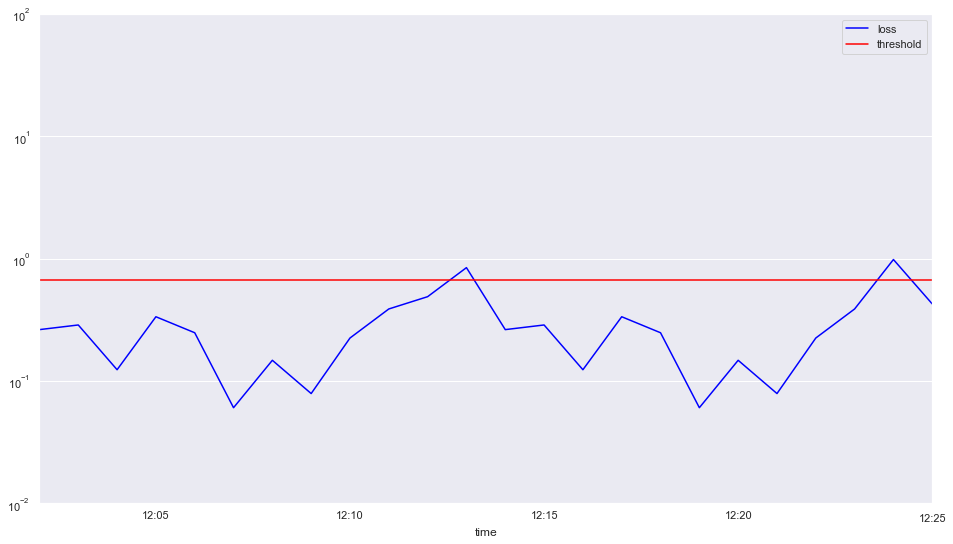

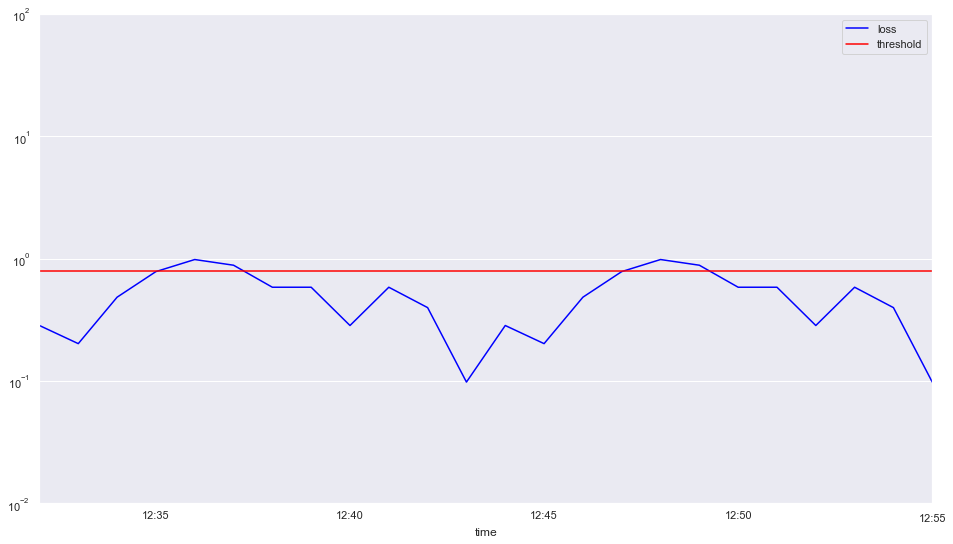

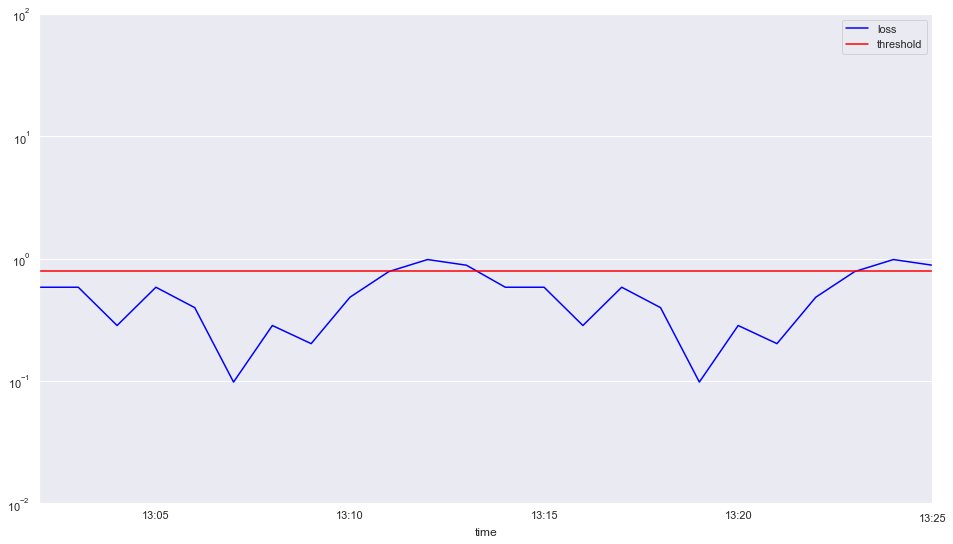

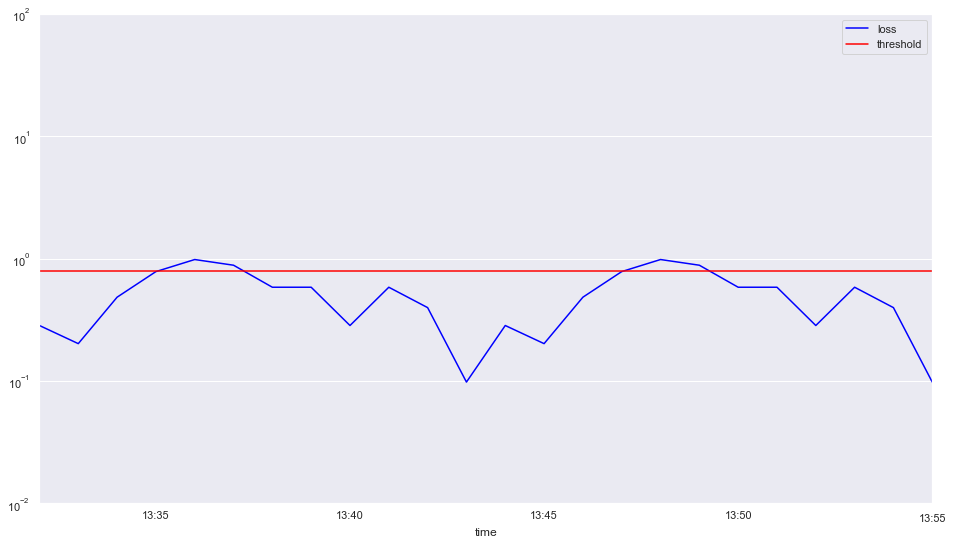

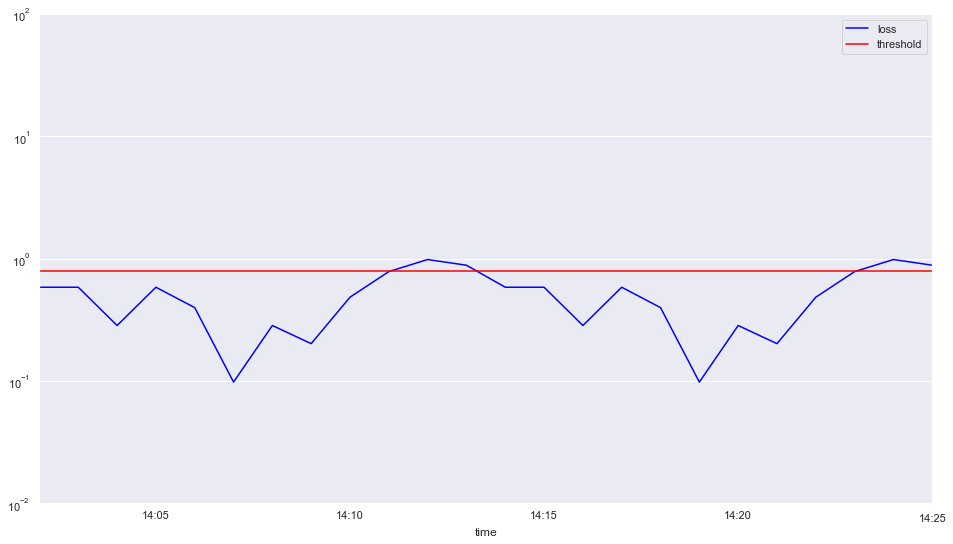

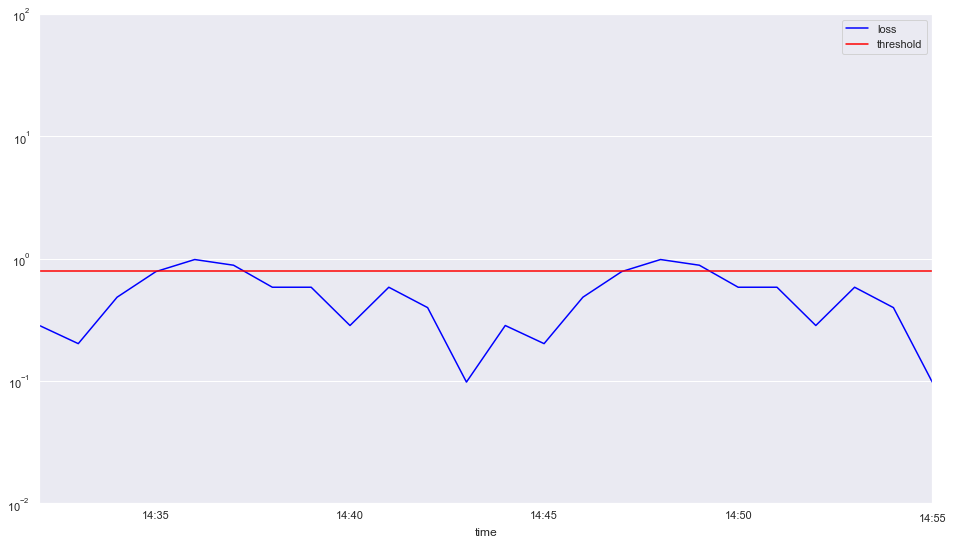

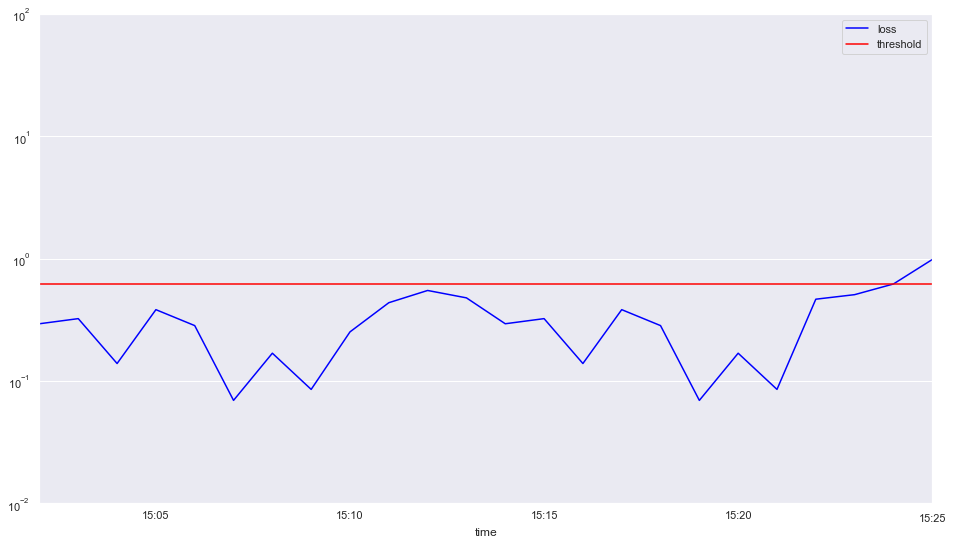

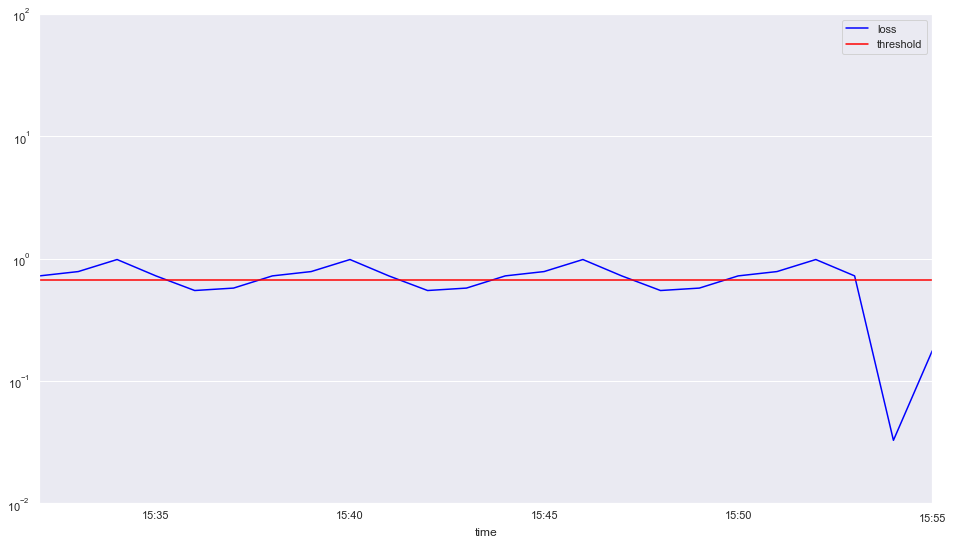

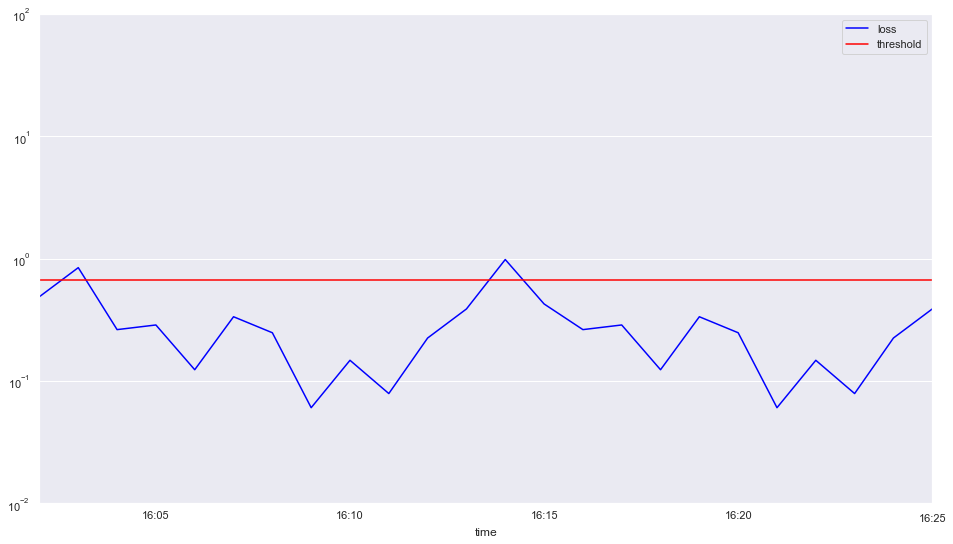

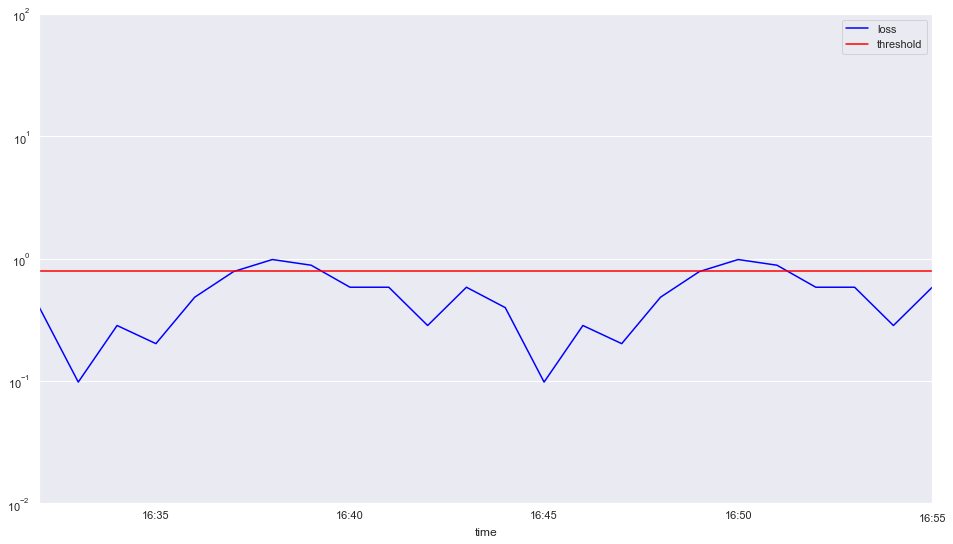

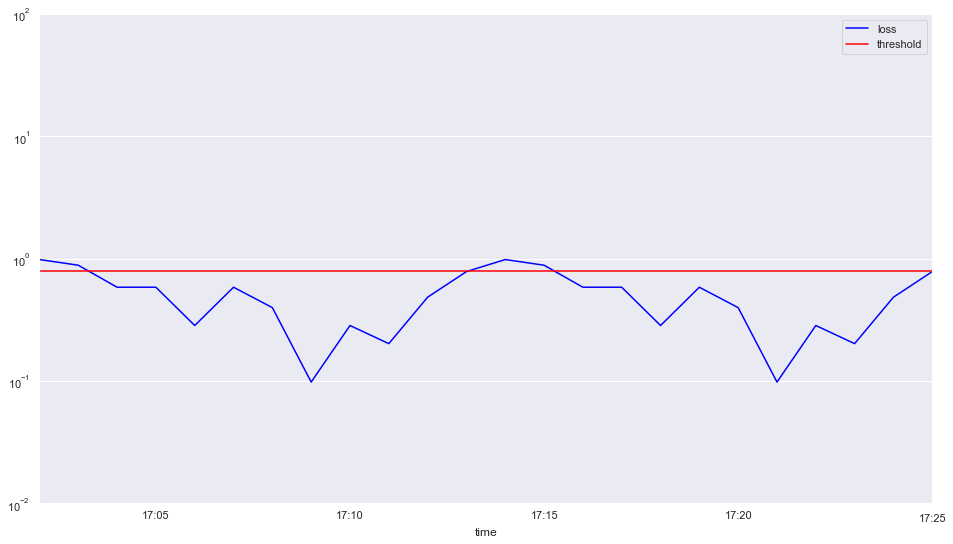

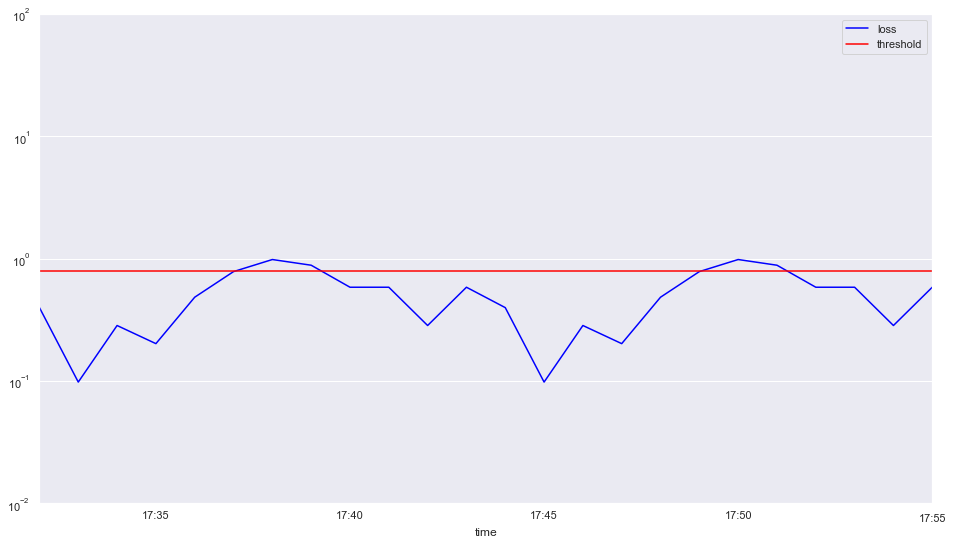

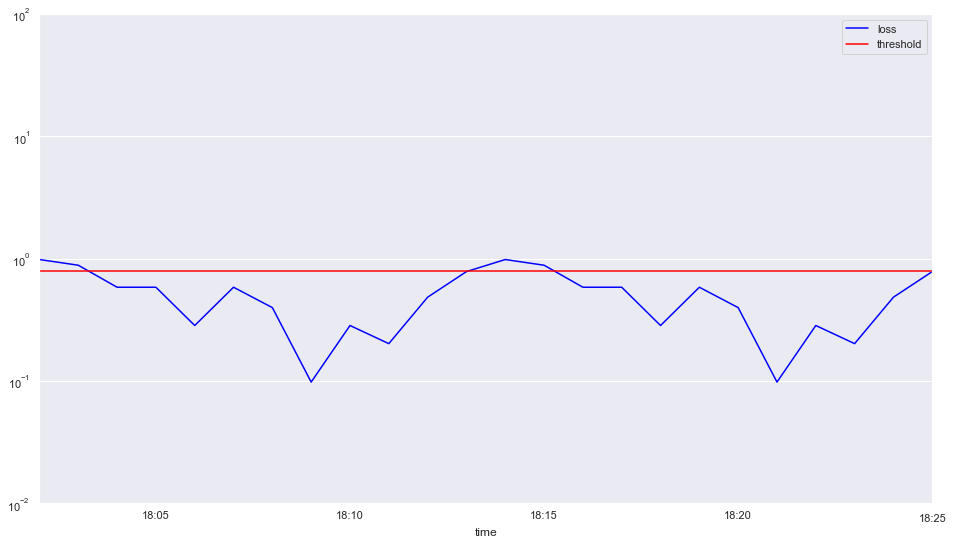

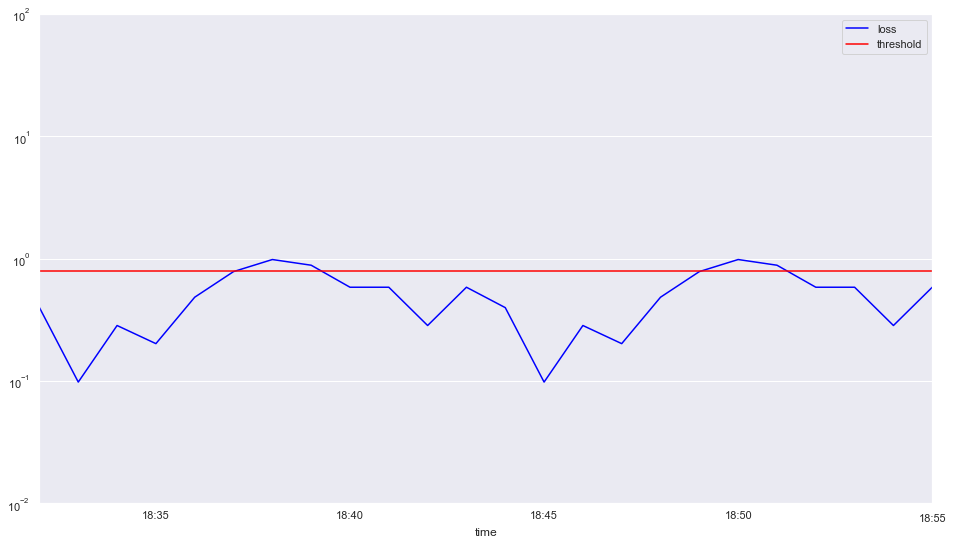

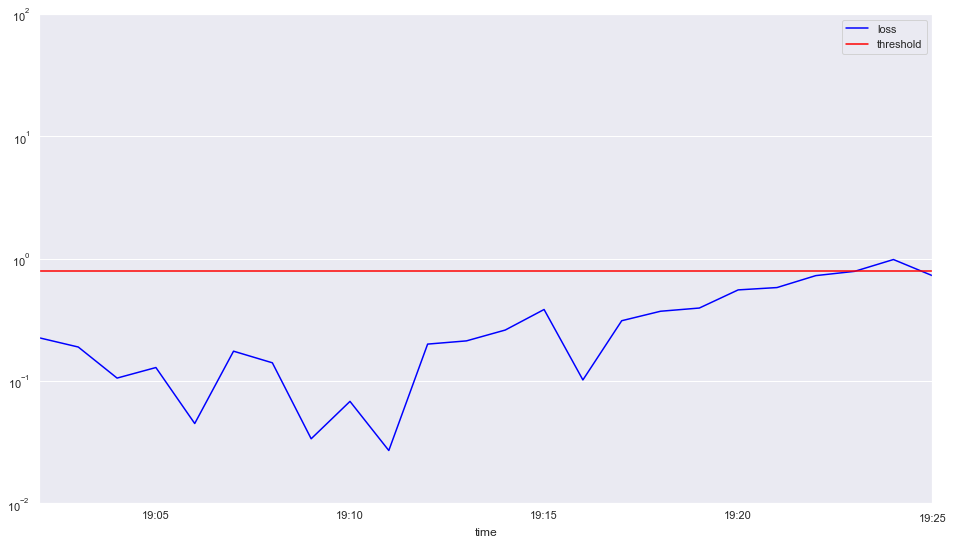

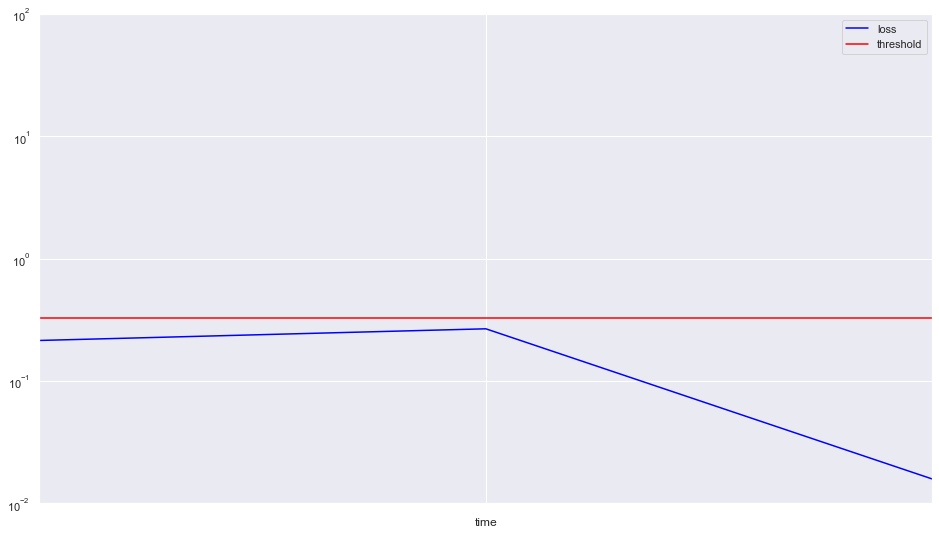

In [286]:
dfin = pd.read_csv(r'D:\testlstm.csv')
dfin.index = pd.to_datetime(dfin['time'])
dfin = dfin[['wspeed','temp']].sort_index()
scaler = MinMaxScaler()
i = 1
while i <= 460:
    train = dfin[i:i+30]
    #print(train.shape)
    x_train = scaler.fit_transform(train)
    x_train_reshape = reshape(5,2,x_train)
    if i < 30:
        model = learn_model(x_train_reshape)
        predit_plot(x_train_reshape,model)
    else:
        predit_plot(x_train_reshape,model)
    i = i + 30
    
#train = dfin['2019-09-12 12:01:00':'2019-09-12 12:31:00']
#test = dfin['2019-09-12 15:30:00':]
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(train)
#x_test = scaler.transform(test)

In [285]:
def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X[[(i+j+1)], :])
        output_X.append(t)
        output_y.append(y[i+lookback+1])
    return output_X, output_y

def flatten(X):
    '''
    Flatten a 3D array.
    
    Input
    X            A 3D array for lstm, where the array is sample x timesteps x features.
    
    Output
    flattened_X  A 2D array, sample x features.
    '''
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def lstmbuild(x):
    inputs = Input(shape=(x.shape[1],x.shape[2]))
    l1 = LSTM(8,activation='relu',return_sequences=True)(inputs)
    l2 = LSTM(4,activation='relu',return_sequences=True)(l1)
    l3 = LSTM(2,activation='relu',return_sequences=True)(l2)
    l4 = LSTM(1,activation='relu',return_sequences=False)(l3)
    l5 = RepeatVector(x.shape[1])(l4)
    l6 = LSTM(1,activation='relu',return_sequences=True)(l5)
    l7 = LSTM(2,activation='relu',return_sequences=True)(l6)
    l8 = LSTM(4,activation='relu',return_sequences=True)(l7)
    l9 = LSTM(8,activation='relu',return_sequences=True)(l8)
    output = TimeDistributed(Dense(x.shape[2]))(l9)
    model = Model(inputs=inputs,outputs=output)
    return model

def reshape(timesteps,n_features,x_train):
    #timesteps = 5
    X, y = temporalize(X = x_train, y = np.zeros(len(x_train)), lookback = timesteps)

    #n_features = 2
    X = np.array(X)
    x_train_reshape = X.reshape(X.shape[0], timesteps, n_features)
    return x_train_reshape

def predit_plot(x_train_reshape,model):

    xpred = flatten(model.predict(x_train_reshape))
    #xpred = xpred.reshape(210,xpred.shape[2])
    xpred = pd.DataFrame(xpred,columns=train.columns)
    xpred.index = train[:xpred.shape[0]].index

    scored1 = pd.DataFrame(index=train[:xpred.shape[0]].index)
    scored1 = pd.DataFrame()
    scored1['loss'] = np.mean(np.abs(xpred-flatten(x_train_reshape)),axis=1)
    stdval = np.array(list(scored1['loss'])).std()
    scored1['threshold'] = 3 * stdval 
    scored1.plot(logy=True, figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])
    
    return 

def learn_model(x_train_reshape):
    model = lstmbuild(x_train_reshape)
    model.compile(optimizer='adam',loss='mae')
    model.summary()
    ep = 10
    bs = 32
    learning = model.fit(x_train_reshape,x_train_reshape,epochs=ep,batch_size=bs,validation_split=0.05).history
    return model

In [248]:
#x_train_reshape = x_train.reshape(210,1,x_train.shape[1])
#x_test_reshape = x_test.reshape(21,1,x_test.shape[1])

In [266]:
timesteps = 5
X, y = temporalize(X = x_train, y = np.zeros(len(x_train)), lookback = timesteps)

n_features = 2
X = np.array(X)
x_train_reshape = X.reshape(X.shape[0], timesteps, n_features)

timesteps = 5
X, y = temporalize(X = x_test, y = np.zeros(len(x_test)), lookback = timesteps)

n_features = 2
X = np.array(X)
x_test_reshape = X.reshape(X.shape[0], timesteps, n_features)


model = lstmbuild(x_train_reshape)
model.compile(optimizer='adam',loss='mae')
model.summary()

ep = 100
bs = 32
learning = model.fit(x_train_reshape,x_train_reshape,epochs=ep,batch_size=bs,validation_split=0.05).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 5, 2)              0         
_________________________________________________________________
lstm_146 (LSTM)              (None, 5, 8)              352       
_________________________________________________________________
lstm_147 (LSTM)              (None, 5, 4)              208       
_________________________________________________________________
lstm_148 (LSTM)              (None, 5, 2)              56        
_________________________________________________________________
lstm_149 (LSTM)              (None, 1)                 16        
_________________________________________________________________
repeat_vector_23 (RepeatVect (None, 5, 1)              0         
_________________________________________________________________
lstm_150 (LSTM)              (None, 5, 1)              12        
__________

(0.0, 1)

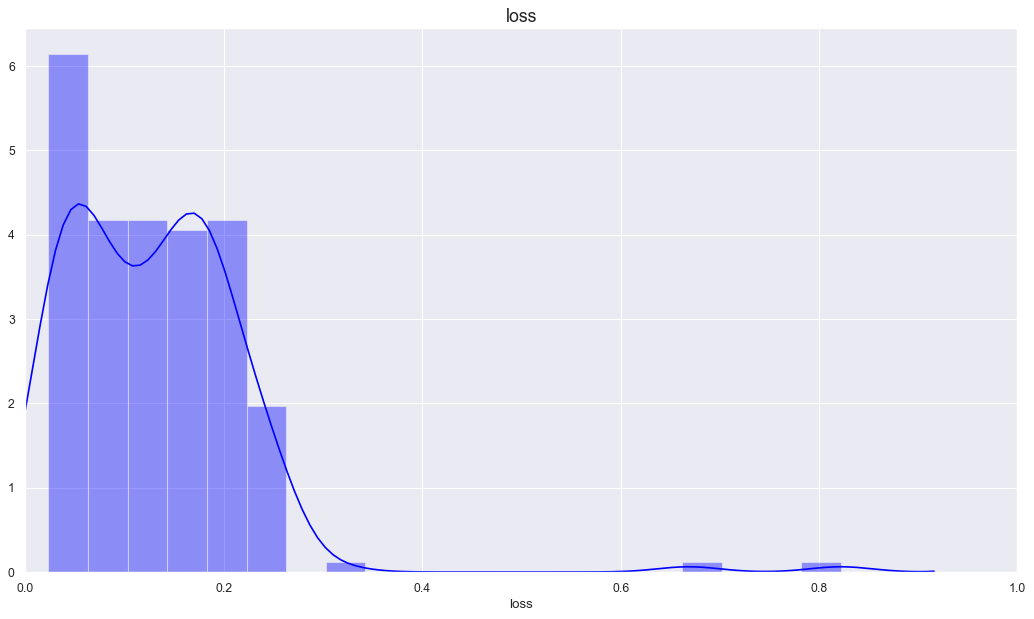

In [250]:
import numpy as np
xpred = flatten(model.predict(x_train_reshape))
#xpred = xpred.reshape(xpred.shape[0],xpred.shape[2])
xpred = pd.DataFrame(xpred,columns=train.columns)
xpred.index = train[:xpred.shape[0]].index

scored = pd.DataFrame(index=train[:xpred.shape[0]].index)
scored = pd.DataFrame()
scored['loss'] = np.mean(np.abs(xpred-flatten(x_train_reshape)),axis=1)
plt.figure(figsize=(16,9),dpi=80)
plt.title('loss',fontsize=16)
sns.distplot(scored['loss'],bins=20,kde=True,color='blue')
plt.xlim([0.0,1])

In [251]:
max(list(scored['loss']))

0.8219877257943153

In [252]:
xpred = flatten(model.predict(x_test_reshape))
#xpred = xpred.reshape(20,xpred.shape[2])
xpred = pd.DataFrame(xpred,columns=test.columns)
xpred.index = test[:xpred.shape[0]].index

scored0 = pd.DataFrame(index=test[:xpred.shape[0]].index)
scored0 = pd.DataFrame()
scored0['loss'] = np.mean(np.abs(xpred-flatten(x_test_reshape)),axis=1)

xpred = flatten(model.predict(x_train_reshape))
#xpred = xpred.reshape(210,xpred.shape[2])
xpred = pd.DataFrame(xpred,columns=train.columns)
xpred.index = train[:xpred.shape[0]].index

scored1 = pd.DataFrame(index=train[:xpred.shape[0]].index)
scored1 = pd.DataFrame()
scored1['loss'] = np.mean(np.abs(xpred-flatten(x_train_reshape)),axis=1)

scored = pd.concat([scored1,scored0],axis=0)

scored['threshold'] = 0.83

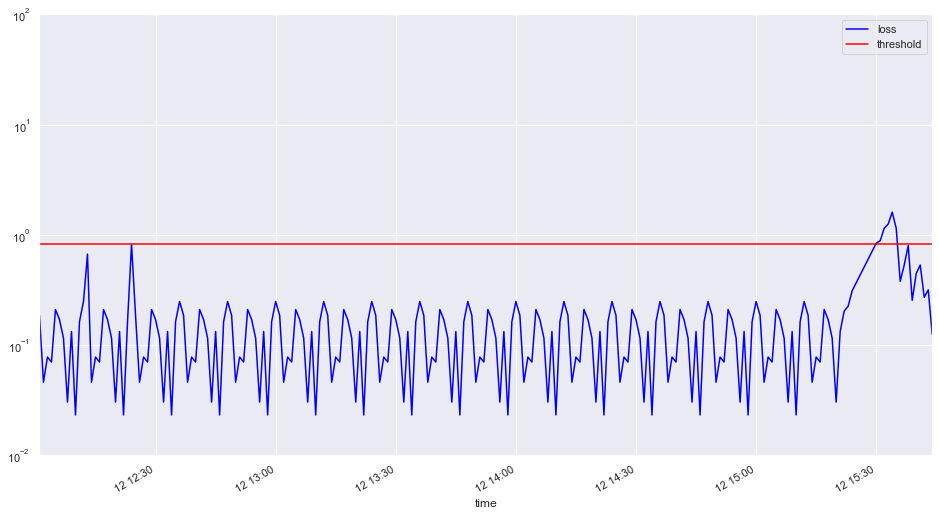

In [253]:
scored.plot(logy=True, figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])